In [75]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data=pd.read_csv("marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
data_num = data.select_dtypes(include=['float64', 'int64'])
data_cat = data.select_dtypes(include=['object'])

In [6]:
data_num.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
(data_num['Income'] == 0).sum()

2317

In [8]:
income_mean = data_num['Income'].mean()
data_num['Income'] = data_num['Income'].replace(0, income_mean)

In [9]:
data_num.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,47209.837802,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,21723.702506,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,34337.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,37657.380009,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
target=data_num["Total Claim Amount"]
data_columns=data_num.drop("Total Claim Amount",axis=1)


def log_transf(x):
    if (x != 0): 
        return np.log(x)
    else: 
        return 0

for col in data_columns:
    data_columns[col] = data_columns[col].apply(log_transf)

In [11]:
data_num_tr=pd.concat([data_columns,target],axis=1)
data_num_tr.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8.748562,10.654163,4.482330,2.365032,3.571112,0.095984,0.801068,434.088794
std,0.652919,0.476088,0.308007,0.990152,0.967170,0.310299,0.739422,290.500092
min,7.548560,9.214034,4.110874,0.000000,0.000000,0.000000,0.000000,0.099007
25%,8.292612,10.443979,4.219508,1.791759,3.178054,0.000000,0.000000,272.258244
50%,8.662190,10.536284,4.418841,2.639057,3.871201,0.000000,0.693147,383.945434
75%,9.100767,11.040038,4.691348,3.135494,4.262680,0.000000,1.386294,547.514839
max,11.330508,11.512735,5.697093,3.555348,4.595120,1.609438,2.197225,2893.239678


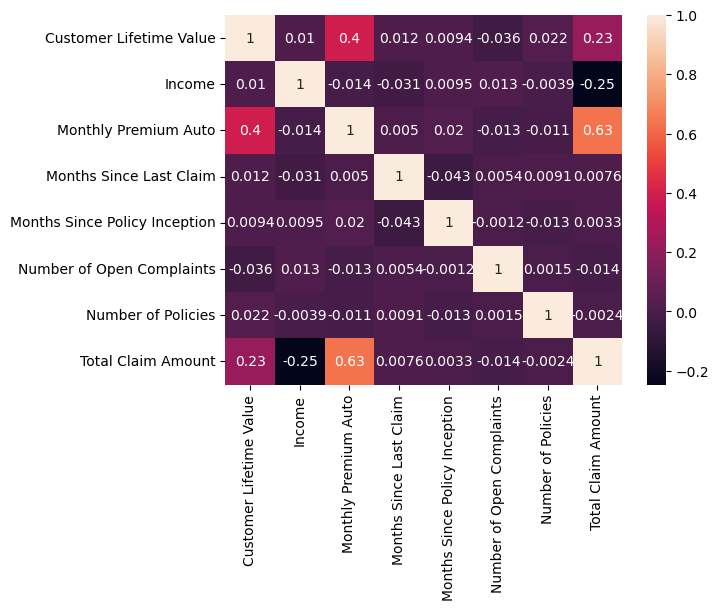

In [12]:
sns.heatmap(data_num.corr(), annot=True)
plt.show()

In [13]:
data_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [14]:
data_cat["Customer"].nunique()

9134

In [15]:
data_cat=data_cat.drop("Customer",axis=1)

In [16]:
data_cat

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [17]:
for i in data_cat:
    data_cat[i].nunique()
    print(i,"-",data_cat[i].nunique())

State - 5
Response - 2
Coverage - 3
Education - 5
Effective To Date - 59
EmploymentStatus - 5
Gender - 2
Location Code - 3
Marital Status - 3
Policy Type - 3
Policy - 9
Renew Offer Type - 4
Sales Channel - 4
Vehicle Class - 6
Vehicle Size - 3


In [18]:
data_cat.columns[0]

'State'

In [19]:
"""
I want to see if there is any correlation between date and total claim amount. I have no info what does
effective to date column means, I will assume it is when it became effective, however Im missing the actual date
of when this data was created, given that I will subtract the most recent date - the effective to date to see if
more days mean higher Total claim amount. If this correlation exists, I will keep it, otherwise will remove column
from my database.
"""

data_date=data_cat["Effective To Date"]
data_cat_columns=data_cat.drop("Effective To Date",axis=1)

In [20]:
data_date = pd.to_datetime(data_date, format='%m/%d/%y')

In [21]:
most_recent_date = data_date.max()
days_since_recent_date = (most_recent_date - data_date).dt.days

In [22]:
data_date = data_date.to_frame(name='Effective To Date')
data_date['Days Since Recent Date'] = days_since_recent_date
print(data_date.head())

  Effective To Date  Days Since Recent Date
0        2011-02-24                       4
1        2011-01-31                      28
2        2011-02-19                       9
3        2011-01-20                      39
4        2011-02-03                      25


In [23]:
data_corr = data_date.join(data_num['Total Claim Amount'])

In [24]:
data_corr

,Effective To Date,Days Since Recent Date,Total Claim Amount
0,2011-02-24,4,384.811147
1,2011-01-31,28,1131.464935
2,2011-02-19,9,566.472247
3,2011-01-20,39,529.881344
4,2011-02-03,25,138.130879
...,...,...,...
9129,2011-02-10,18,198.234764
9130,2011-02-12,16,379.200000
9131,2011-02-06,22,790.784983
9132,2011-02-03,25,691.200000


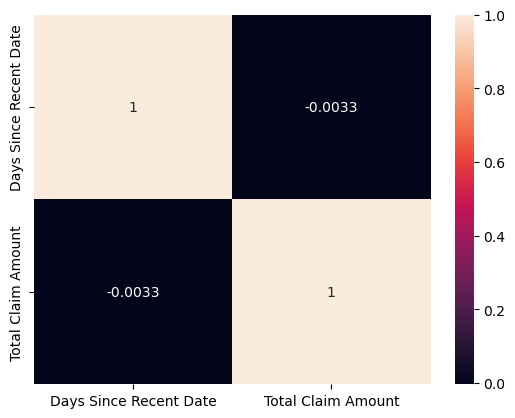

In [25]:
sns.heatmap(data_corr.corr(), annot=True)
plt.show()

In [26]:
"""
No correlation at all, dates only are split between two months. Will continue to work withouth effective to date column.
"""
print()

In [27]:
data_cat_columns

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [28]:
for i in data_cat_columns:
    data_cat_columns[i].nunique()
    print(i,"-",data_cat_columns[i].nunique())

State - 5
Response - 2
Coverage - 3
Education - 5
EmploymentStatus - 5
Gender - 2
Location Code - 3
Marital Status - 3
Policy Type - 3
Policy - 9
Renew Offer Type - 4
Sales Channel - 4
Vehicle Class - 6
Vehicle Size - 3


In [29]:
data_cat_columns=data_cat_columns.drop("Policy Type",axis=1)

In [30]:
for i in data_cat_columns:
    data_cat[i].nunique()
    print(i,"-",data_cat[i].nunique())

State - 5
Response - 2
Coverage - 3
Education - 5
EmploymentStatus - 5
Gender - 2
Location Code - 3
Marital Status - 3
Policy - 9
Renew Offer Type - 4
Sales Channel - 4
Vehicle Class - 6
Vehicle Size - 3


In [31]:
data_cat_columns["Policy"].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [32]:
ordinal_map = {'Personal L1': 0, 'Personal L2': 1, 'Personal L3': 2,'Corporate L1':3,'Corporate L2':4,'Corporate L3':5,'Special L1':7,'Special L2':7,'Special L3':8 }
data_cat_columns['Policy'] = data_cat_columns["Policy"].map(ordinal_map)

data_cat_columns

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,5,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,2,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,2,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,4,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,0,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,5,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,4,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,1,Offer3,Branch,Four-Door Car,Large


In [33]:
data_cat_columns["Vehicle Class"].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [34]:
ordinal_map = {'Two-Door Car':0, 'Four-Door Car':1, 'SUV':2, 'Luxury SUV':5, 'Sports Car':3,
       'Luxury Car':4}
data_cat_columns['Vehicle Class'] = data_cat_columns["Vehicle Class"].map(ordinal_map)

In [35]:
data_cat_columns

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,5,Offer1,Agent,0,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,2,Offer3,Agent,1,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,2,Offer1,Agent,0,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,4,Offer1,Call Center,2,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,Offer1,Agent,1,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,0,Offer2,Web,1,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,5,Offer1,Branch,1,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,4,Offer1,Branch,1,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,1,Offer3,Branch,1,Large


In [36]:
data_cat_columns["Vehicle Size"].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [37]:
ordinal_map = {'Small':0, 'Medsize':1, 'Large':2}
data_cat_columns['Vehicle Size'] = data_cat_columns["Vehicle Size"].map(ordinal_map)

In [38]:
data_cat_columns

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,5,Offer1,Agent,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,2,Offer3,Agent,1,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,2,Offer1,Agent,0,1
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,4,Offer1,Call Center,2,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,Offer1,Agent,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,0,Offer2,Web,1,1
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,5,Offer1,Branch,1,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,4,Offer1,Branch,1,1
9132,California,No,Extended,College,Employed,M,Suburban,Married,1,Offer3,Branch,1,2


In [39]:
for i in data_cat_columns:
    data_cat_columns[i].nunique()
    print(i,"-",data_cat_columns[i].nunique())

State - 5
Response - 2
Coverage - 3
Education - 5
EmploymentStatus - 5
Gender - 2
Location Code - 3
Marital Status - 3
Policy - 8
Renew Offer Type - 4
Sales Channel - 4
Vehicle Class - 6
Vehicle Size - 3


In [40]:
"""
State - 5
Response - 2
Coverage - 3
Education - 5 
EmploymentStatus - 5 Done (Need to apply One-Encoder)
Gender - 2 apply One-Encoder
Location Code - 3 apply One-Encoder
Marital Status - 3 apply One-Encoder
Policy - 8 DONE
Renew Offer Type - 4 apply One-Encoder
Sales Channel - 4 apply One-Encoder
Vehicle Class - 6 DONE
Vehicle Size - 3 DONE
"""
print()

In [41]:
data_cat_columns["EmploymentStatus"].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [42]:
data_cat_columns["EmploymentStatus"].value_counts(normalize=True)

Employed         0.623823
Unemployed       0.253668
Medical Leave    0.047296
Disabled         0.044340
Retired          0.030874
Name: EmploymentStatus, dtype: float64

In [43]:
data_cat_columns["EmploymentStatus"] = data_cat_columns["EmploymentStatus"].replace(["Medical Leave", "Disabled", "Retired"], "Other")

In [44]:
data_cat_columns["EmploymentStatus"].value_counts(normalize=True)

Employed      0.623823
Unemployed    0.253668
Other         0.122509
Name: EmploymentStatus, dtype: float64

In [45]:
data_cat_columns["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [46]:
ordinal_map = {'Bachelor':2, 'College':1, 'Master':3, 'High School or Below':0, 'Doctor':4}
data_cat_columns["Education"] = data_cat_columns["Education"].map(ordinal_map)
data_cat_columns

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,2,Employed,F,Suburban,Married,5,Offer1,Agent,0,1
1,Arizona,No,Extended,2,Unemployed,F,Suburban,Single,2,Offer3,Agent,1,1
2,Nevada,No,Premium,2,Employed,F,Suburban,Married,2,Offer1,Agent,0,1
3,California,No,Basic,2,Unemployed,M,Suburban,Married,4,Offer1,Call Center,2,1
4,Washington,No,Basic,2,Employed,M,Rural,Single,0,Offer1,Agent,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,2,Employed,M,Urban,Married,0,Offer2,Web,1,1
9130,California,Yes,Extended,1,Employed,F,Suburban,Divorced,5,Offer1,Branch,1,1
9131,California,No,Extended,2,Unemployed,M,Suburban,Single,4,Offer1,Branch,1,1
9132,California,No,Extended,1,Employed,M,Suburban,Married,1,Offer3,Branch,1,2


In [47]:
"""
State - 5 apply One-Encoder
Response - 2 apply One-Encoder
Coverage - 3 Done
Education - 5 Done
EmploymentStatus - 5 Done (Need to apply One-Encoder)
Gender - 2 apply One-Encoder
Location Code - 3 apply One-Encoder
Marital Status - 3 apply One-Encoder
Policy - 8 DONE
Renew Offer Type - 4 apply One-Encoder
Sales Channel - 4 apply One-Encoder
Vehicle Class - 6 DONE
Vehicle Size - 3 DONE
"""
print()

In [48]:
ordinal_map = {"Basic":0,"Extended":1,"Premium":2}
data_cat_columns["Coverage"] = data_cat_columns["Coverage"].map(ordinal_map)
data_cat_columns

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,0,2,Employed,F,Suburban,Married,5,Offer1,Agent,0,1
1,Arizona,No,1,2,Unemployed,F,Suburban,Single,2,Offer3,Agent,1,1
2,Nevada,No,2,2,Employed,F,Suburban,Married,2,Offer1,Agent,0,1
3,California,No,0,2,Unemployed,M,Suburban,Married,4,Offer1,Call Center,2,1
4,Washington,No,0,2,Employed,M,Rural,Single,0,Offer1,Agent,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,2,Employed,M,Urban,Married,0,Offer2,Web,1,1
9130,California,Yes,1,1,Employed,F,Suburban,Divorced,5,Offer1,Branch,1,1
9131,California,No,1,2,Unemployed,M,Suburban,Single,4,Offer1,Branch,1,1
9132,California,No,1,1,Employed,M,Suburban,Married,1,Offer3,Branch,1,2


In [49]:
"""
APPLY ONE-ENCODER
State - 5 apply One-Encoder
Response - 2 apply One-Encoder

EmploymentStatus - 5 Done (Need to apply One-Encoder)
Gender - 2 apply One-Encoder
Location Code - 3 apply One-Encoder
Marital Status - 3 apply One-Encoder

Renew Offer Type - 4 apply One-Encoder
Sales Channel - 4 apply One-Encoder

"""

data_one=data_cat_columns[["State","Response","EmploymentStatus","Gender","Location Code","Marital Status","Renew Offer Type","Sales Channel"]]
data_enc=data_cat_columns.drop(data_one,axis=1)

In [50]:
data_one


,State,Response,EmploymentStatus,Gender,Location Code,Marital Status,Renew Offer Type,Sales Channel
0,Washington,No,Employed,F,Suburban,Married,Offer1,Agent
1,Arizona,No,Unemployed,F,Suburban,Single,Offer3,Agent
2,Nevada,No,Employed,F,Suburban,Married,Offer1,Agent
3,California,No,Unemployed,M,Suburban,Married,Offer1,Call Center
4,Washington,No,Employed,M,Rural,Single,Offer1,Agent
...,...,...,...,...,...,...,...,...
9129,California,No,Employed,M,Urban,Married,Offer2,Web
9130,California,Yes,Employed,F,Suburban,Divorced,Offer1,Branch
9131,California,No,Unemployed,M,Suburban,Single,Offer1,Branch
9132,California,No,Employed,M,Suburban,Married,Offer3,Branch


In [51]:
data_enc

,Coverage,Education,Policy,Vehicle Class,Vehicle Size
0,0,2,5,0,1
1,1,2,2,1,1
2,2,2,2,0,1
3,0,2,4,2,1
4,0,2,0,1,1
...,...,...,...,...,...
9129,0,2,0,1,1
9130,1,1,5,1,1
9131,1,2,4,1,1
9132,1,1,1,1,2


In [52]:
encoder = OneHotEncoder(drop='first')
data_one_encoded = encoder.fit_transform(data_one)
data_one = pd.DataFrame(data_one_encoded.toarray(), columns=encoder.get_feature_names(data_one.columns))
data_one

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Other,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9130,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [53]:
data_enc

,Coverage,Education,Policy,Vehicle Class,Vehicle Size
0,0,2,5,0,1
1,1,2,2,1,1
2,2,2,2,0,1
3,0,2,4,2,1
4,0,2,0,1,1
...,...,...,...,...,...
9129,0,2,0,1,1
9130,1,1,5,1,1
9131,1,2,4,1,1
9132,1,1,1,1,2


In [55]:
data_num_tr

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,0.000000,0.000000,384.811147
1,8.850738,10.536284,4.543295,2.564949,3.737670,0.000000,2.079442,1131.464935
2,9.464008,10.794809,4.682131,2.890372,3.637586,0.000000,0.693147,566.472247
3,8.941920,10.536284,4.663439,2.890372,4.174387,0.000000,1.945910,529.881344
4,7.942253,10.688211,4.290459,2.484907,3.784190,0.000000,0.000000,138.130879
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,0.000000,0.693147,198.234764
9130,8.038031,9.980634,4.369448,2.639057,3.332205,0.000000,0.000000,379.200000
9131,9.007476,10.536284,4.442651,2.197225,3.610918,1.098612,0.693147,790.784983
9132,8.925912,9.996112,4.564348,3.526361,1.098612,0.000000,1.098612,691.200000


In [57]:
data = pd.concat([data_one, data_enc, data_num_tr], axis=1)

In [58]:
data

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Other,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,7.924260,10.937988,4.234107,3.465736,1.609438,0.000000,0.000000,384.811147
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,1,8.850738,10.536284,4.543295,2.564949,3.737670,0.000000,2.079442,1131.464935
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,9.464008,10.794809,4.682131,2.890372,3.637586,0.000000,0.693147,566.472247
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2,1,8.941920,10.536284,4.663439,2.890372,4.174387,0.000000,1.945910,529.881344
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,7.942253,10.688211,4.290459,2.484907,3.784190,0.000000,0.000000,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1,1,10.060747,11.183602,4.290459,2.890372,4.488636,0.000000,0.693147,198.234764
9130,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,1,8.038031,9.980634,4.369448,2.639057,3.332205,0.000000,0.000000,379.200000
9131,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,1,9.007476,10.536284,4.442651,2.197225,3.610918,1.098612,0.693147,790.784983
9132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,2,8.925912,9.996112,4.564348,3.526361,1.098612,0.000000,1.098612,691.200000


In [62]:
#Split Test Data

X = data.drop('Total Claim Amount', axis=1)
y = data['Total Claim Amount']

#Train Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
lm=linear_model.LinearRegression().fit(X_train,y_train)
predictions=lm.predict(X_train)
predictions

array([372.37664795, 633.51587342, 600.63862573, ..., 343.75068956,
       -74.91067579, 429.17008265])

In [70]:
y_train

5061    302.400000
179     710.433775
2593    542.400000
2430    302.400000
3610    408.000000
           ...    
7984     67.530904
7983    307.200000
3087    379.029102
3837     99.894584
5739    374.400000
Name: Total Claim Amount, Length: 7307, dtype: float64

In [76]:
r2=r2_score(y_train,predictions)
mean_squared=mean_squared_error(y_train,predictions)
root_mean_squared = np.sqrt(mean_squared)
mean_absolute=mean_absolute_error(y_train,predictions)

In [77]:
print(r2)
print(mean_squared)
print(root_mean_squared)
print(mean_absolute)

0.7495215428651066
21156.624365841075
145.45316897833843
100.30250976227659


In [78]:
#PRESENT RESULTS

<AxesSubplot:>

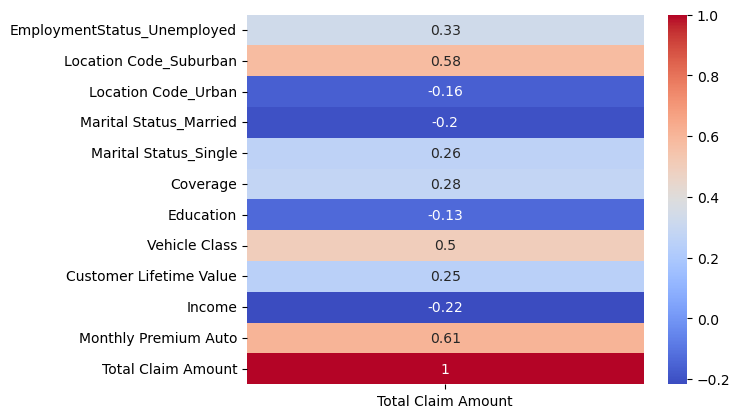

In [82]:
corr_matrix = data.corr()[["Total Claim Amount"]]
corr_matrix_filtered = corr_matrix[abs(corr_matrix["Total Claim Amount"]) >= 0.1]
sns.heatmap(corr_matrix_filtered, annot=True, cmap="coolwarm")

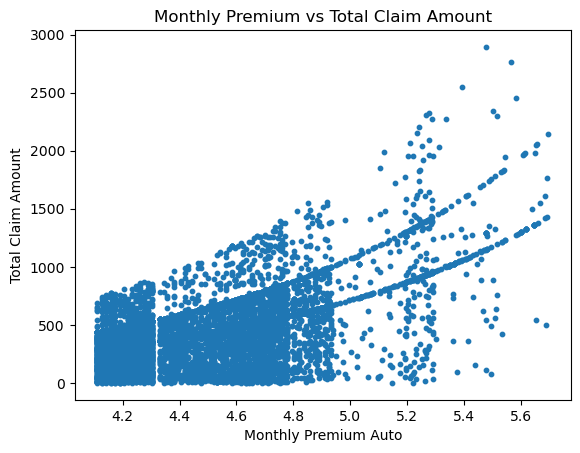

In [87]:
plt.scatter(data["Monthly Premium Auto"],data["Total Claim Amount"],s=10)
plt.xlabel("Monthly Premium Auto")
plt.ylabel("Total Claim Amount")

plt.title("Monthly Premium vs Total Claim Amount")

plt.show()


In [97]:
metrics={"R2 Scorer": r2,
         "Mean Squared Error": mean_squared,
         "Root Mean Squared": root_mean_squared,
         "Mean Absolute": mean_absolute}

data_metrics= pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
data_metrics

,Metric,Value
0,R2 Scorer,0.749522
1,Mean Squared Error,21156.624366
2,Root Mean Squared,145.453169
3,Mean Absolute,100.302510
